In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Plant Growth Data Classification

**Plant Growth Data Classification**

**Problem Statement**

Agricultural productivity relies on understanding and managing soil conditions to match the nutrient requirements of specific crops. With varying needs for nitrogen (N), phosphorus (P), and potassium (K), as well as sensitivity to soil temperature and pH levels, it is critical for farmers to determine which crops are most suitable for their soil conditions to optimize yield.

This dataset includes key soil properties—nutrient levels (N, P, K), average soil temperature (°F), and pH (acidity or basicity)—and maps them to specific crop types (e.g., rice, maize, various legumes, fruits, and cash crops like cotton and coffee). Using this data, we aim to develop a predictive model that suggests the most suitable crop types based on given soil characteristics.

**Objective**

To build a machine learning model that recommends the best crop(s) based on soil nutrient levels (N, P, K), temperature, and pH, thereby supporting informed decision-making for farmers and improving agricultural efficiency.

**Goals**

1. **Analyze Soil-Condition Requirements for Different Crops**: Explore the soil nutrient composition, temperature, and pH ranges ideal for each crop in the dataset.

2. **Develop Predictive Model**: Train a classification model that suggests optimal crop choices based on the input conditions of N, P, K levels, temperature, and pH.

3. **Evaluate Model Accuracy**: Assess the model's accuracy in correctly recommending crop types by validating it against test data.
Provide Insights for Crop Rotation or Soil Amendment: Use the model to suggest soil amendments or crop rotation strategies to achieve better suitability for desired crops.


# Importing Libraries

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data/Plan_Growth_recommendation.csv')

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df.label.value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
x = df.drop(columns=['label'])
y = df['label']

# EDA

## Sweetviz.html

In [11]:
pip install sweetviz

In [12]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html('Sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Autoviz

In [13]:
pip install autoviz

In [14]:
from autoviz.AutoViz_Class import AutoViz_Class
av = AutoViz_Class()
av.AutoViz(filename = 'New_Viz', dfte = df)

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (2200, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
N,int64,0.000000,6,0.000000,140.000000,No issue
P,int64,0.000000,5,5.000000,145.000000,Column has 138 outliers greater than upper bound (128.00) or lower than lower bound(-32.00). Cap them or remove them.
K,int64,0.000000,3,5.000000,205.000000,Column has 200 outliers greater than upper bound (92.50) or lower than lower bound(-23.50). Cap them or remove them.
temperature,float64,0.000000,NA,8.825675,43.675493,Column has 86 outliers greater than upper bound (37.25) or lower than lower bound(14.08). Cap them or remove them.
humidity,float64,0.000000,NA,14.258040,99.981876,Column has 30 outliers greater than upper bound (134.48) or lower than lower bound(15.73). Cap them or remove them.
ph,float64,0.000000,NA,3.504752,9.935091,Column has 57 outliers greater than upper bound (8.35) or lower than lower bound(4.54). Cap them or remove them.
rainfall,float64,0.000000,NA,20.211267,298.560117,Column has 100 outliers greater than upper bound (213.84) or lower than lower bound(-25.02). Cap them or remove them.
label,object,0.000000,1,,,No issue


Number of All Scatter Plots = 10
All Plots done
Time to run AutoViz = 8 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# Automated Model Building using Pycaret Package

In [15]:
pip install pycaret

In [16]:
data = df.sample(frac = 0.8, random_state= 132).reset_index(drop=True)
data_test = df.drop(data.index).reset_index(drop=True)

In [17]:
print(data.shape)
print(data_test.shape)

(1760, 8)
(440, 8)


In [18]:
from pycaret.classification import *

In [19]:
class_models = setup(data = data, target='label', session_id= 123)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Multiclass
3,Target mapping,"apple: 0, banana: 1, blackgram: 2, chickpea: 3, coconut: 4, coffee: 5, cotton: 6, grapes: 7, jute: 8, kidneybeans: 9, lentil: 10, maize: 11, mango: 12, mothbeans: 13, mungbean: 14, muskmelon: 15, orange: 16, papaya: 17, pigeonpeas: 18, pomegranate: 19, rice: 20, watermelon: 21"
4,Original data shape,"(1760, 8)"
5,Transformed data shape,"(1760, 8)"
6,Transformed train set shape,"(1232, 8)"
7,Transformed test set shape,"(528, 8)"
8,Numeric features,7
9,Preprocess,True


# Comparing Different Models

In [20]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9951,1.0000,0.9951,0.9961,0.9951,0.9949,0.9950,0.0410
rf,Random Forest Classifier,0.9943,1.0000,0.9943,0.9952,0.9943,0.9940,0.9941,0.2730
qda,Quadratic Discriminant Analysis,0.9911,0.0000,0.9911,0.9926,0.9910,0.9906,0.9907,0.0300
lightgbm,Light Gradient Boosting Machine,0.9911,1.0000,0.9911,0.9927,0.9910,0.9906,0.9907,2.9920
et,Extra Trees Classifier,0.9903,1.0000,0.9903,0.9923,0.9901,0.9898,0.9899,0.2090
xgboost,Extreme Gradient Boosting,0.9878,0.9998,0.9878,0.9904,0.9878,0.9872,0.9874,1.2670
dt,Decision Tree Classifier,0.9854,0.9923,0.9854,0.9876,0.9851,0.9847,0.9848,0.0410
gbc,Gradient Boosting Classifier,0.9805,0.0000,0.9805,0.9845,0.9805,0.9796,0.9798,6.2430
knn,K Neighbors Classifier,0.9740,0.9985,0.9740,0.9801,0.9738,0.9728,0.9732,0.0550
lr,Logistic Regression,0.9716,0.0000,0.9716,0.9762,0.9715,0.9702,0.9705,2.4920


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

# Building Best Model

In [21]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9839,1.0000,0.9839,0.9885,0.9836,0.9831,0.9834
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9919,0.9999,0.9919,0.9930,0.9918,0.9915,0.9915
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9919,1.0000,0.9919,0.9930,0.9918,0.9915,0.9915
7,0.9919,0.9999,0.9919,0.9930,0.9918,0.9915,0.9915
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# Fine Tuning of the Model

In [22]:
tuned_nb = tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9839,1.0000,0.9839,0.9885,0.9836,0.9831,0.9834
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9919,0.9999,0.9919,0.9930,0.9918,0.9915,0.9915
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9919,1.0000,0.9919,0.9930,0.9918,0.9915,0.9915
7,0.9919,0.9999,0.9919,0.9930,0.9918,0.9915,0.9915
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Prediction

In [23]:
predict_model(tuned_nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9905,0,0.9905,0.9912,0.9905,0.9901,0.9901


,N,P,K,temperature,humidity,ph,rainfall,label,prediction_label
1413,20,72,19,32.476482,64.348488,7.397191,65.820457,blackgram,blackgram
214,80,90,47,26.597435,79.358986,6.210845,107.394470,banana,banana
922,11,14,5,11.503229,94.893318,6.946355,115.568375,orange,orange
1050,27,57,24,27.335348,43.357960,6.091863,142.330368,pigeonpeas,pigeonpeas
549,28,122,197,19.893639,82.733665,5.856575,69.662567,grapes,grapes
...,...,...,...,...,...,...,...,...,...
1137,69,46,41,23.641249,80.285980,5.012140,263.110321,rice,rice
898,23,45,21,31.465113,51.799393,8.985348,74.443306,mothbeans,mothbeans
414,99,15,27,27.417112,56.636364,6.086922,127.924606,coffee,coffee
401,0,137,195,22.435902,80.186119,6.329500,65.397316,grapes,grapes


In [24]:
predict_test = predict_model(tuned_nb, data = data_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9955,0,0.9955,1.0000,0.9977,0.9942,0.9942


In [25]:
predict_test.head()

,N,P,K,temperature,humidity,ph,rainfall,label,prediction_label
0,49,55,51,24.872120,93.905602,6.676579,135.169449,papaya,papaya
1,59,62,49,43.360516,93.351913,6.941497,114.778069,papaya,papaya
2,63,58,47,26.830540,90.753799,6.864144,144.665649,papaya,papaya
3,70,65,52,30.420122,93.126595,6.583529,75.952950,papaya,papaya
4,63,50,52,28.645555,93.226425,6.751748,115.816391,papaya,papaya


# Visualzation of the Result

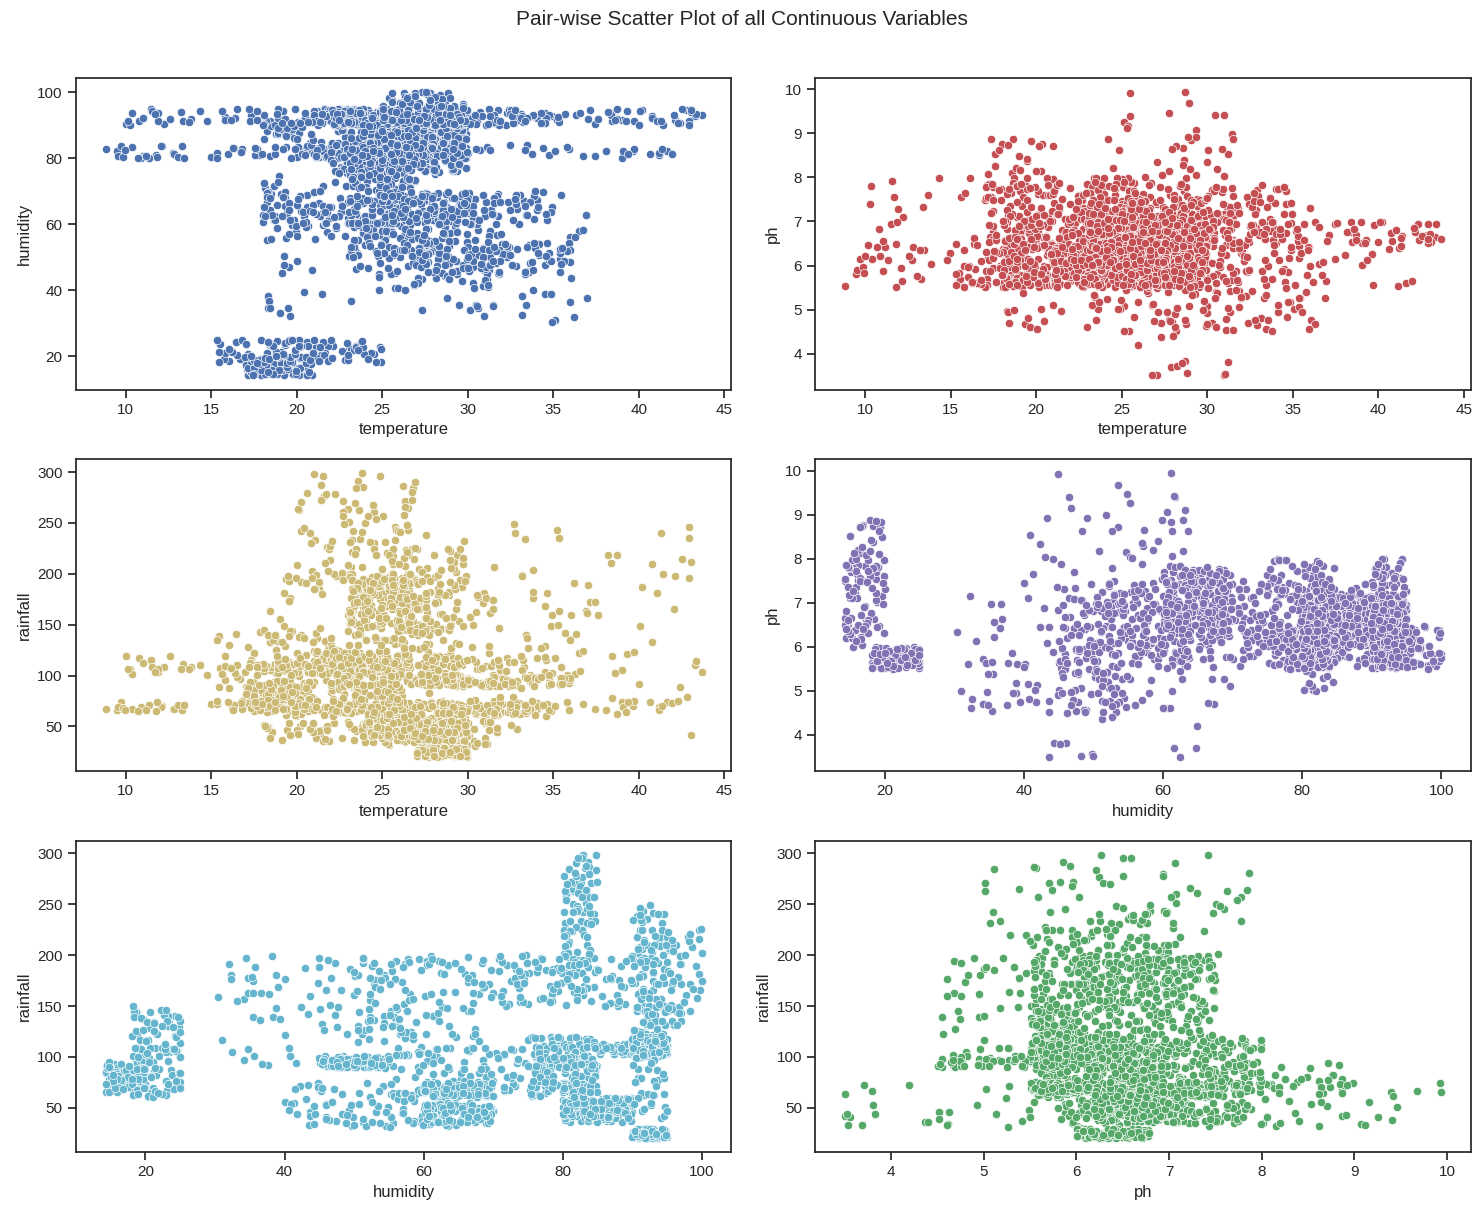

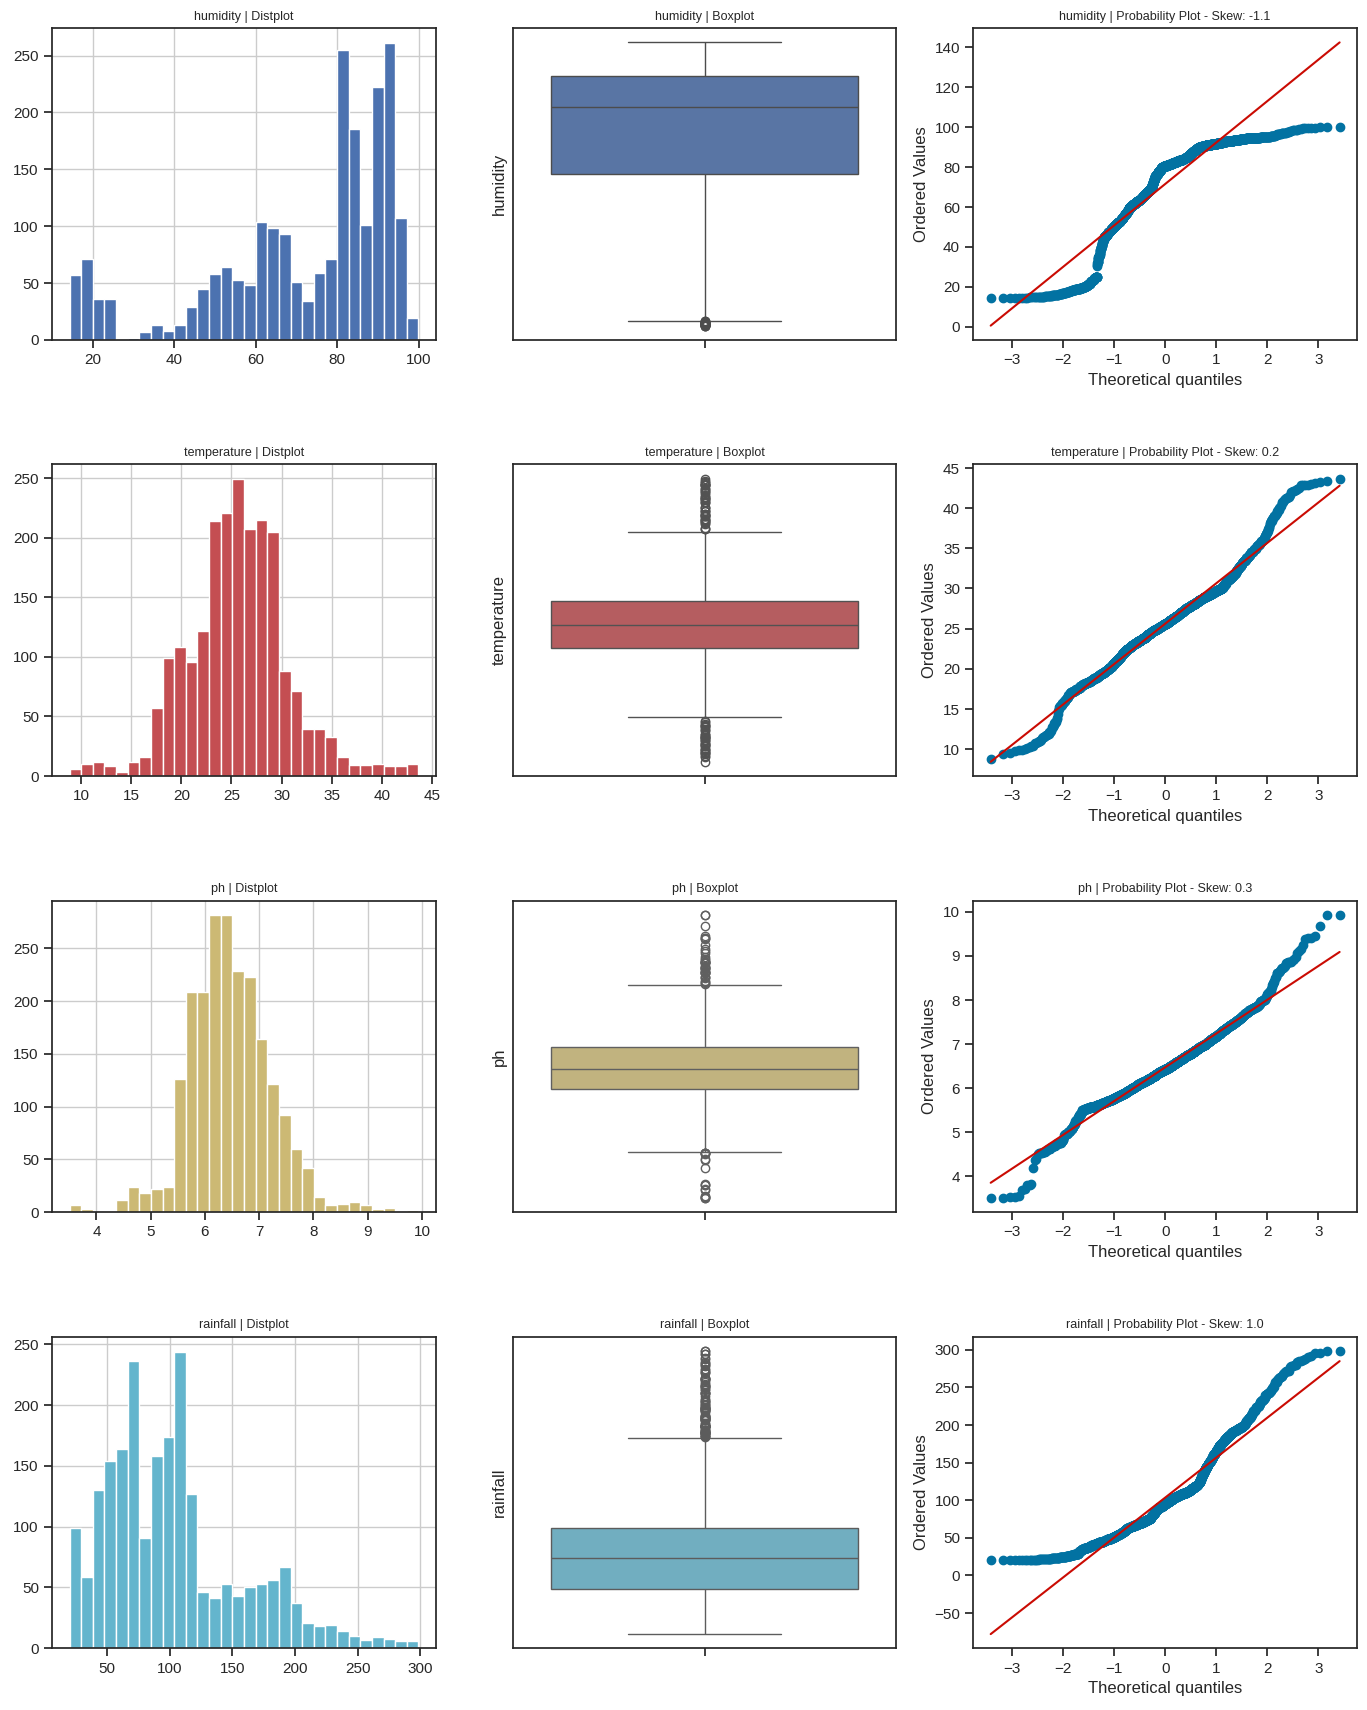

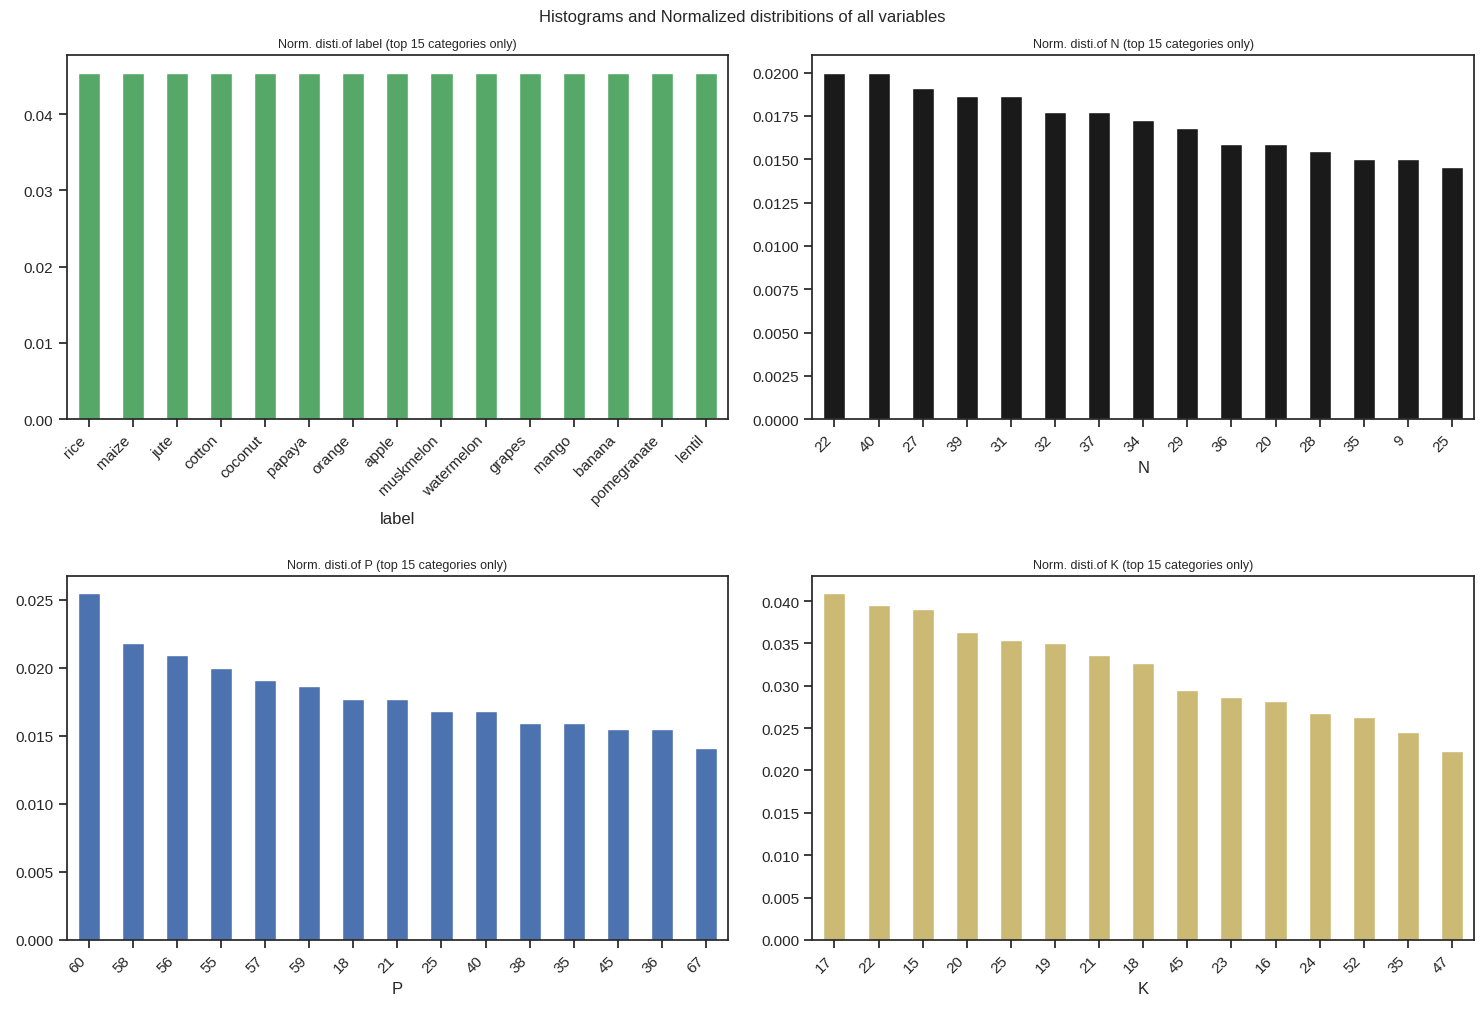

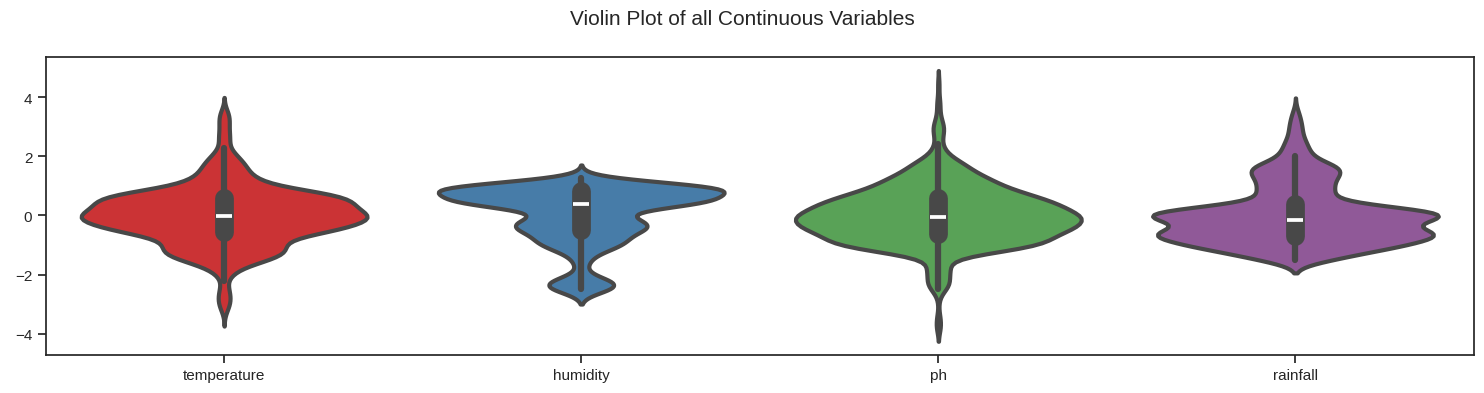

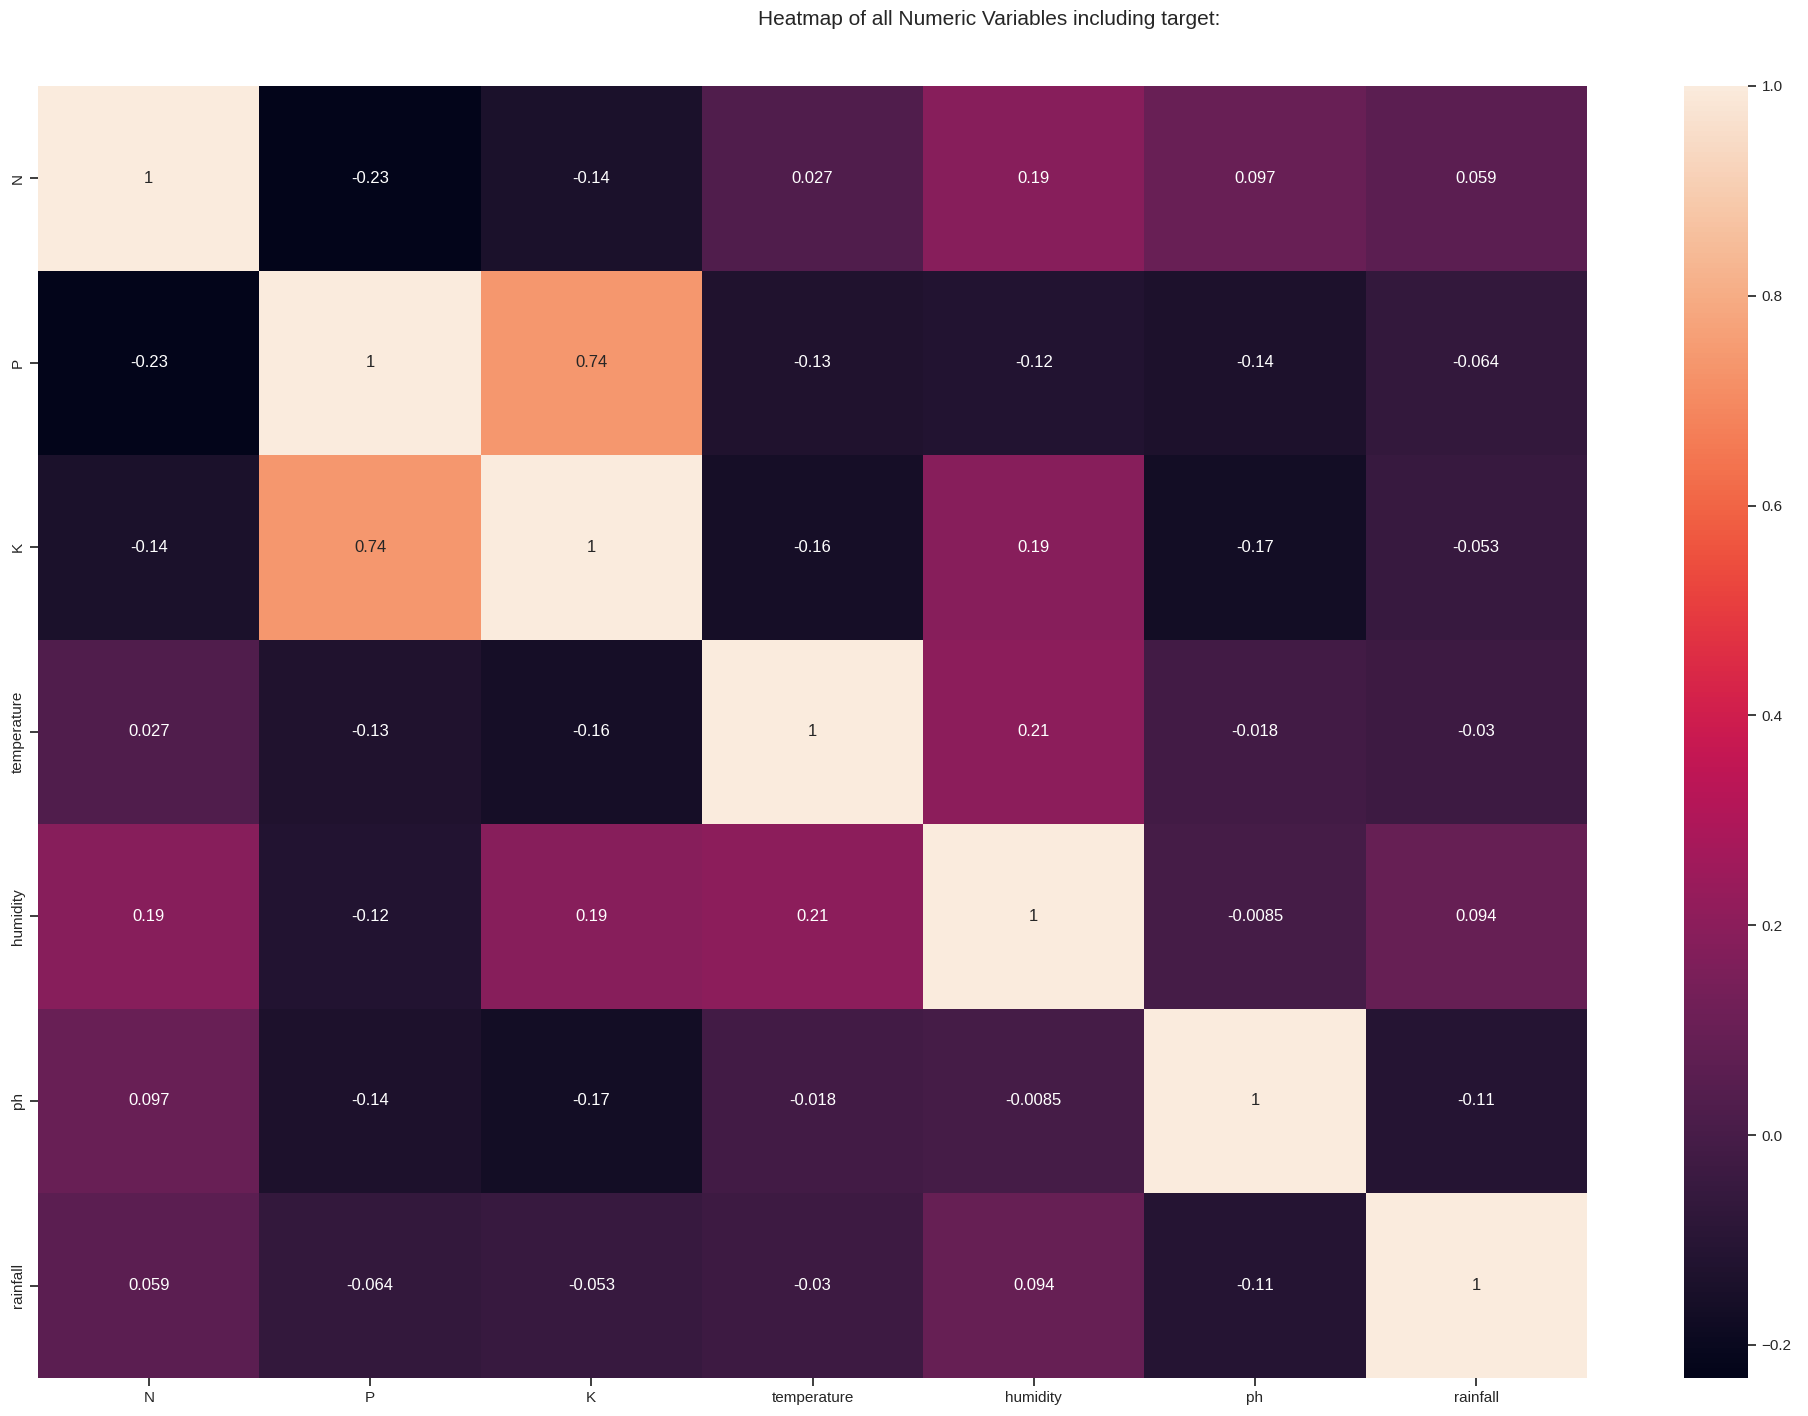

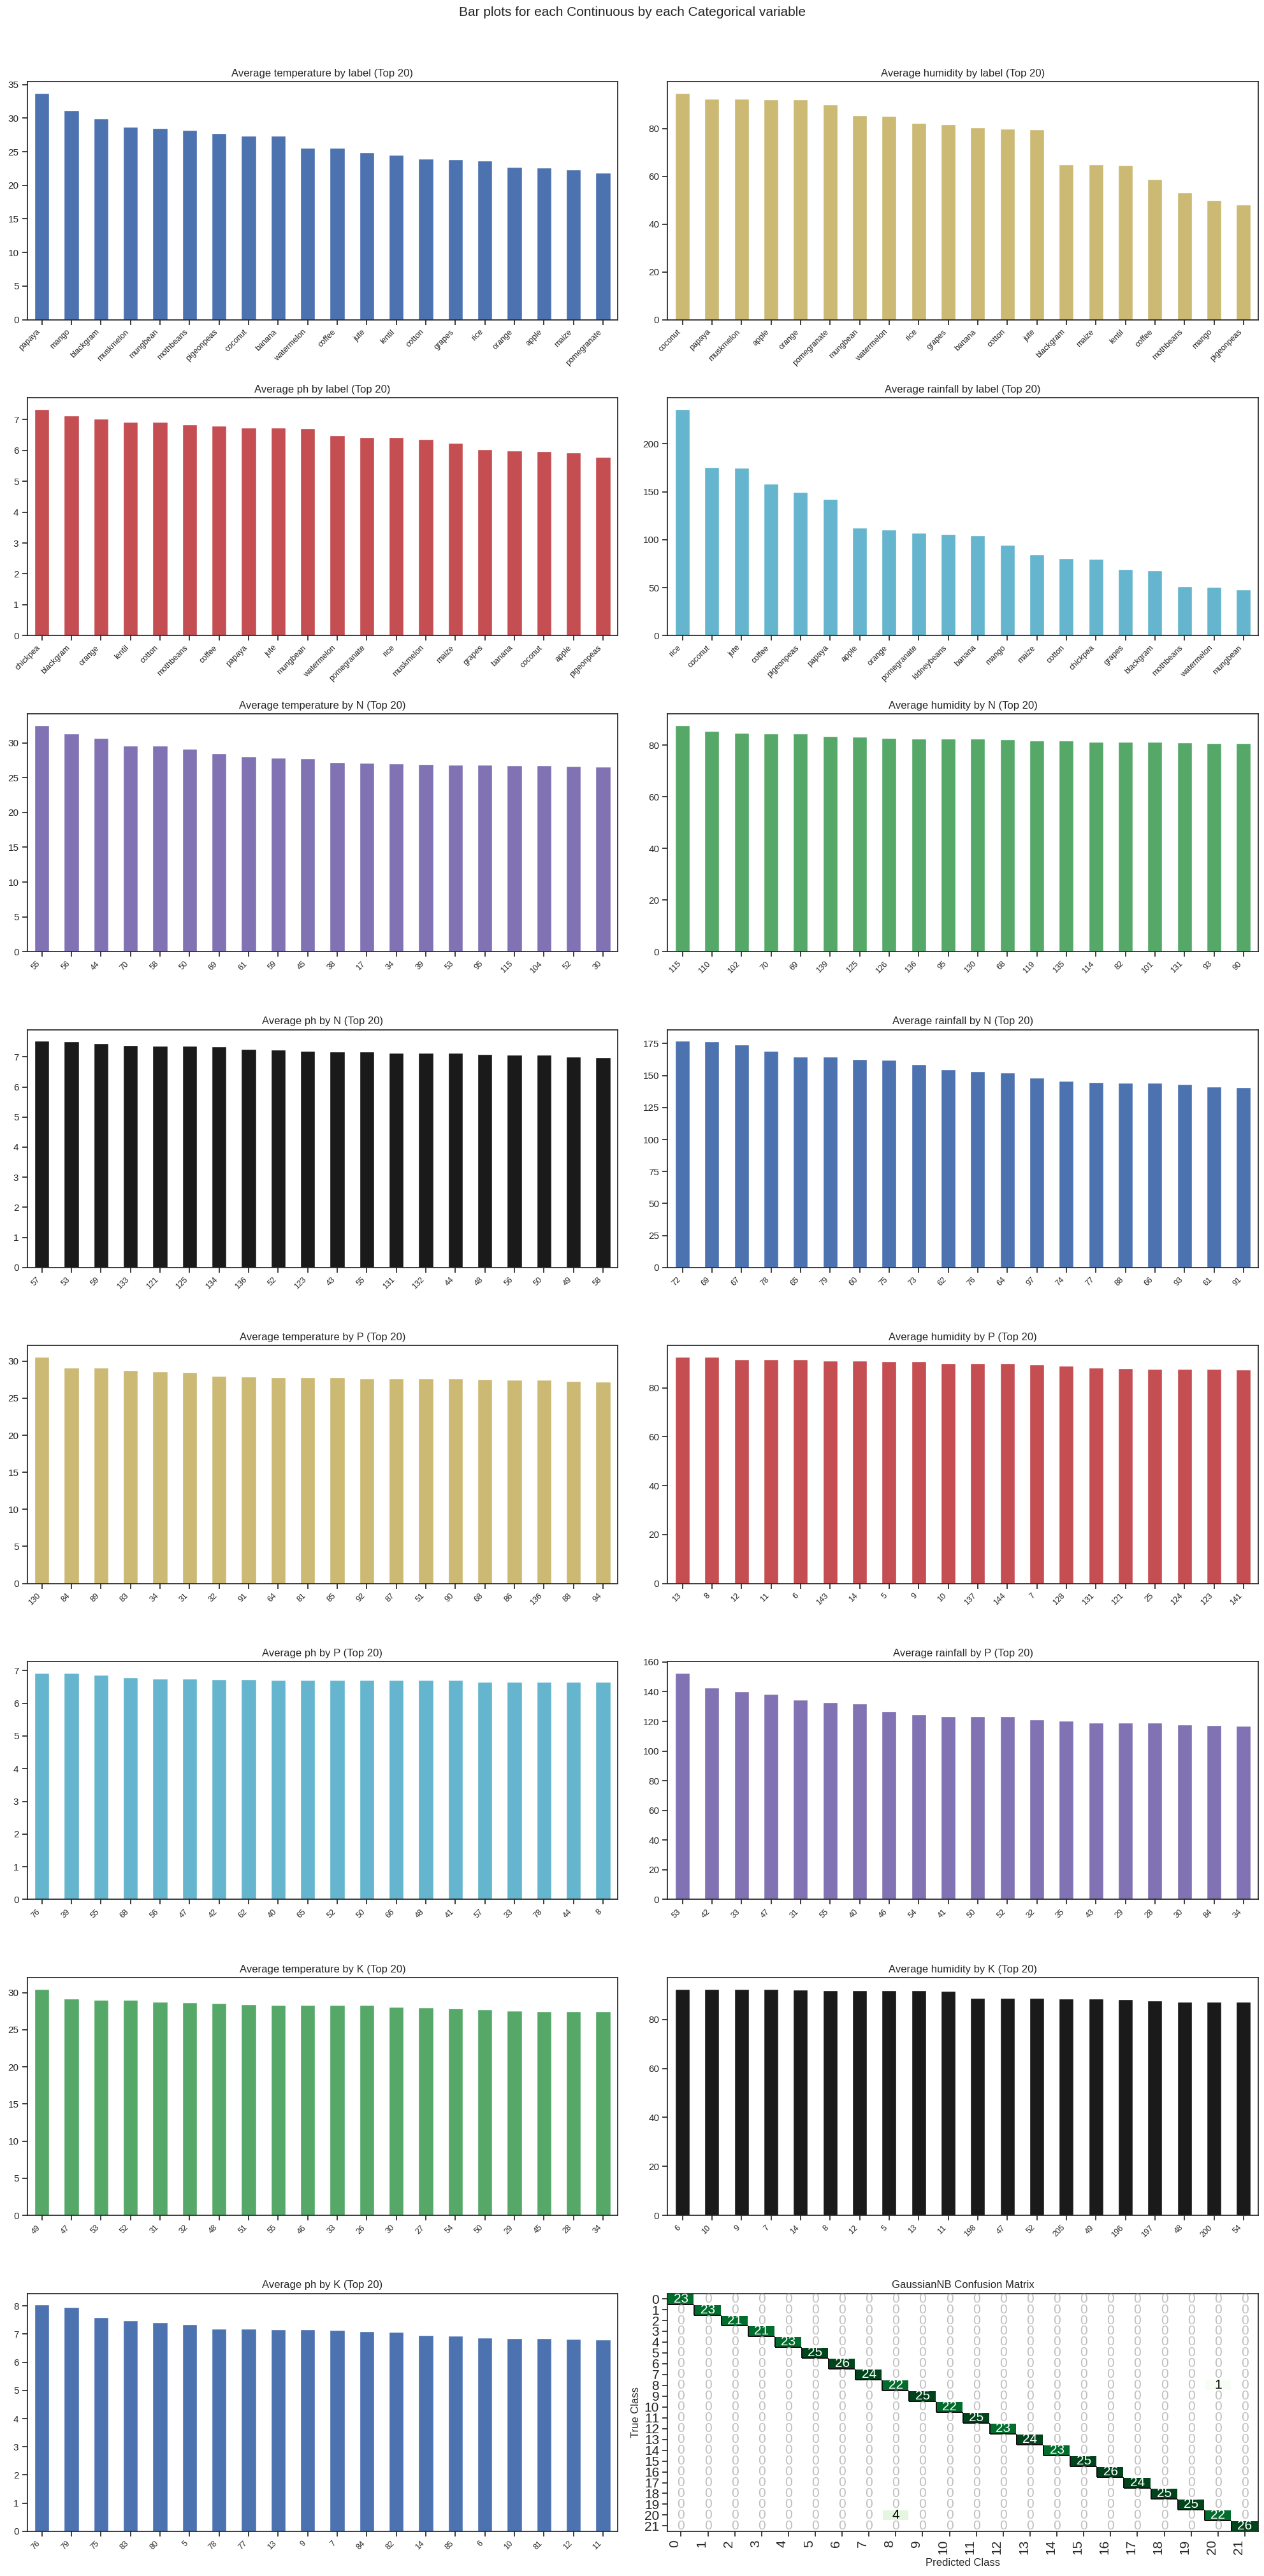

In [26]:
plot_model(tuned_nb, plot= 'confusion_matrix')

# Saving the Result

In [27]:
save_model(tuned_nb, 'Tuned_nb_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['N', 'P', 'K', 'temperature',
                                              'humidity', 'ph', 'rainfall'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_im